In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/baseball/KBO_2019_player_gamestats.csv', encoding='cp949')


In [3]:
data.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


# 꾸준한 선수? VS 여름에 힘 떨어지는 선수

In [4]:
# '일자' 컬럼에서 월에 해당하는 값만 선택하여 '월' 컬럼을 추가하겠습니다. 
# 시리즈에서 반복문을 통해 하나씩 계산/점검을 진행하는 방식을 이용하였습니다. 

month_list = []

for month in data['일자']:
  li = month.split("-")
  month_list.append(li[0])

data['월'] = month_list

In [5]:
data.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [6]:
# 분석에 활용할 컬럼만 선택하겠습니다. 
columns_select = ['팀', '이름', '생일','일자', '상대','타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비', '월']

data = data[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [7]:
# 피벗 테이블을 이용해 월별 실적을 집계하겠습니다. 
# fill_value = 0 옵션을 이용해 데이터가 비어있는 경우 0을 입력하도록 하였습니다. (해당 월에 실적이 전혀 없으므로 0으로 정리)

data_player_month = data.pivot_table(index=['팀','이름', '생일','월'], values=['타수', '안타','홈런','루타','타점','볼넷','사구','희비'],aggfunc = sum, fill_value=0)
data_player_month

루타  볼넷  사구  안타   타수  타점  홈런  희비
팀   이름  생일         월                                  
KIA 고영창 1989-02-24 04   0   0   0   0    0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3   18   0   0   0
                   04  17   3   0  13   44   6   0   0
                   05  31  10   0  24   82  10   1   2
                   06  29   8   1  24   81   8   1   0
...                    ..  ..  ..  ..  ...  ..  ..  ..
한화  호잉  1989-05-18 05  47   9   2  31  100  14   3   0
                   06  41   4   1  23   93  13   4   0
                   07  42   6   1  26   72  13   4   1
                   08  41   4   1  26   94  13   3   0
                   09   4   0   0   2   11   2   0   0

[1261 rows x 8 columns]

In [8]:
# 현재 인덱스로 정리된 팀/이름/생일/월 데이터를 컬럼으로 변경하겠습니다
data_player_month = data_player_month.reset_index()
data_player_month

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,한화,호잉,1989-05-18,05,47,9,2,31,100,14,3,0
1257,한화,호잉,1989-05-18,06,41,4,1,23,93,13,4,0
1258,한화,호잉,1989-05-18,07,42,6,1,26,72,13,4,1
1259,한화,호잉,1989-05-18,08,41,4,1,26,94,13,3,0


In [9]:
# 데이터프레임에 포함된 타자의 타율/출루율/장타율/OPS 데이터를 정리하는 함수입니다. 
def cal_hit(df):
    '''
    - 타율 : 공을 쳐서 나가는 비율 --> 안타 / 타수
    - 출루율: 진루해서 나가는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [10]:
# data_player_month  데이터의 타자별 주요 실적을 계산합니다. 

player_month_stat = cal_hit(data_player_month)
player_month_stat = player_month_stat.dropna()
player_month_stat

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.388889,0.277778,0.666667
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.363636,0.386364,0.750000
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.404762,0.378049,0.782811
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.402439,0.358025,0.760464
5,KIA,김선빈,1989-12-18,07,18,6,0,14,39,5,1,0,0.358974,0.512821,0.461538,0.974359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,한화,호잉,1989-05-18,05,47,9,2,31,100,14,3,0,0.310000,0.411765,0.470000,0.881765
1257,한화,호잉,1989-05-18,06,41,4,1,23,93,13,4,0,0.247312,0.297872,0.440860,0.738733
1258,한화,호잉,1989-05-18,07,42,6,1,26,72,13,4,1,0.361111,0.445946,0.583333,1.029279
1259,한화,호잉,1989-05-18,08,41,4,1,26,94,13,3,0,0.276596,0.326316,0.436170,0.762486


In [11]:
# 월별 출류율 정리하겠습니다.
month_pivot = player_month_stat.pivot_table(index = ['팀','이름','생일'], values = '출루율', columns='월')
month_pivot = month_pivot.reset_index()
month_pivot

월,팀,이름,생일,03,04,05,06,07,08,09,10
0,KIA,김선빈,1989-12-18,0.388889,0.363636,0.404762,0.402439,0.512821,0.351648,0.414634,NaN
1,KIA,김주찬,1981-03-25,0.272727,0.245283,0.375000,0.361111,0.452381,0.405063,0.333333,NaN
2,KIA,나지완,1985-05-19,0.379310,0.379310,0.218750,0.533333,0.071429,NaN,NaN,NaN
3,KIA,류승현,1997-07-01,0.000000,0.420000,0.321429,0.290909,NaN,NaN,0.277778,NaN
4,KIA,문경찬,1992-07-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
224,한화,최윤석,1987-03-28,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
225,한화,최재훈,1989-08-27,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
226,한화,최진행,1985-08-17,NaN,0.437500,0.245902,0.384615,NaN,NaN,0.366667,NaN
227,한화,하주석,1994-02-25,0.263158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# KBO 출루율 최고타자 불러오기

In [12]:
player_stat = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/baseball/player_stat.csv',encoding='cp949')
player_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147


In [13]:
# 불러온 시즌 기록과, 월별 출루율 데이터를 병합합니다. 
df = pd.merge(player_stat, month_pivot, how = 'left', left_on=['팀','이름','생일'], right_on=['팀','이름','생일'])
df.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS,03,04,05,06,07,08,09,10
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055,0.388889,0.363636,0.404762,0.402439,0.512821,0.351648,0.414634,NaN
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409,0.272727,0.245283,0.375000,0.361111,0.452381,0.405063,0.333333,NaN
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625,0.379310,0.379310,0.218750,0.533333,0.071429,NaN,NaN,NaN
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169,0.000000,0.420000,0.321429,0.290909,NaN,NaN,0.277778,NaN
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147,NaN,0.500000,0.336538,0.322917,0.306452,0.233010,0.258824,NaN


In [14]:
# 출루율 실적을 기준으로 정렬하고, 출루율 상위 50인의 데이터만 가져오겠습니다
df_sort = df.sort_values(by='출루율',ascending=False).head(50)
df_sort

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS,03,04,05,06,07,08,09,10
46,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.500000,0.645161,1.145161,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
10,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.487234,0.484649,0.971883,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
54,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.486747,0.571066,1.057813,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
15,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.472973,0.495434,0.968407,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
112,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.465863,0.557895,1.023758,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
99,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.461066,0.514831,0.975896,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
50,NC,박석민,1985-06-22,172,65,12,96,364,74,19,3,0.263736,0.456464,0.472527,0.928992,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
114,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.452504,0.521127,0.973631,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
69,두산,김재호,1985-03-21,139,69,8,105,385,51,4,11,0.272727,0.450495,0.361039,0.811534,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


In [15]:
# 출루율 관련 실적만 선택하겠습니다. 
df_selected = df_sort[['팀', '이름', '출루율', '03', '04', '05', '06', '07', '08', '09', '10']]
df_selected

,팀,이름,출루율,03,04,05,06,07,08,09,10
46,NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
10,KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
54,NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
15,KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
112,키움,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
99,삼성,러프,0.461066,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
50,NC,박석민,0.456464,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
134,한화,최재훈,0.455243,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
114,키움,샌즈,0.452504,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
69,두산,김재호,0.450495,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


In [16]:
# heatmap을 그리기 위하여 수치형이 아닌 부분은 index로 변경
df_selected = df_selected.set_index(['팀','이름'])
df_selected

,,출루율,03,04,05,06,07,08,09,10
팀,이름,,,,,,,,,
NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
키움,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
삼성,러프,0.461066,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
NC,박석민,0.456464,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
한화,최재훈,0.455243,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
키움,샌즈,0.452504,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860


In [17]:
# colab 한글폰트 사용 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


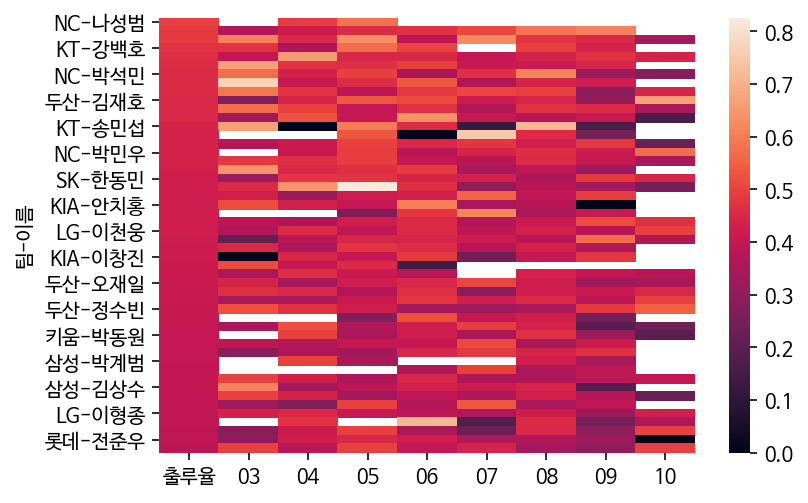

In [18]:
import seaborn as sns
sns.heatmap(df_selected)

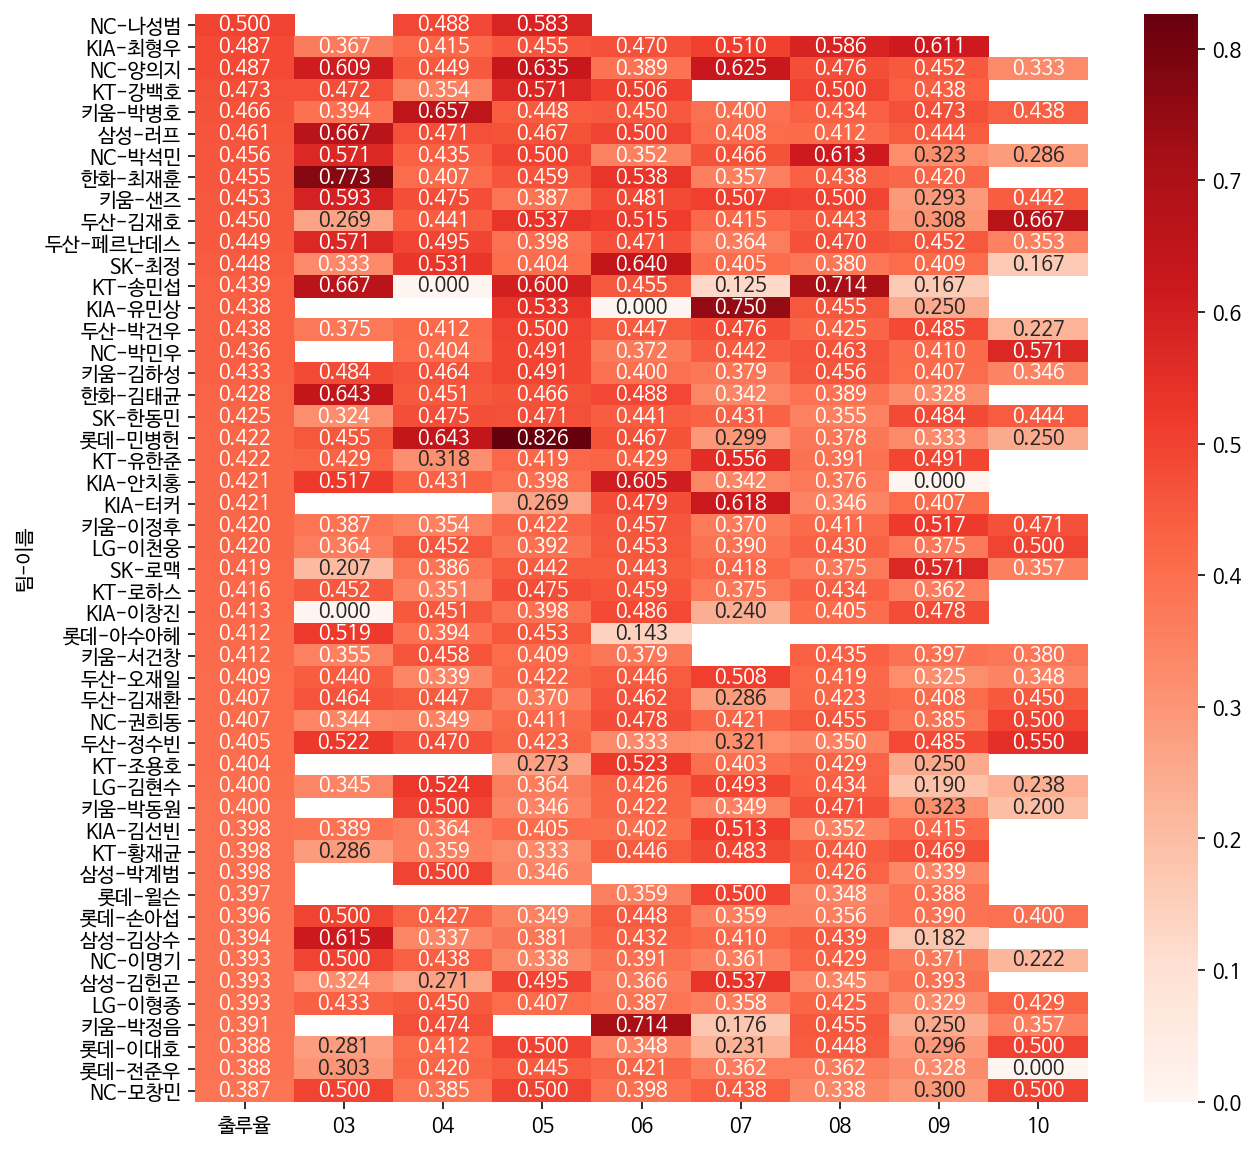

In [20]:
# 월별 출루율을 히트맵으로 그려보겠습니다. 
# 출루율 실적을 히트맵에 표현하고,  컬러맵은 Reds 를 활용하여 출루율이 높을 수록 붉은색이 진하게 표현되도록 하였습니다. 

fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(df_selected, 
            annot=True,
            fmt='.3f',
            cmap='Reds'
            )

In [21]:
# 월별 출루율을  시즌 출루율 대비한 +- 값으로 변경하여, 월별 변화 정도를 살펴보겠습니다. 
# 시즌 전체 대비 월별 실적 

for col in df_selected.columns[1:]:
  df_selected[col] = df_selected[col] - df_selected['출루율']

df_selected['출루율'] = 0.0
df_selected

,,출루율,03,04,05,06,07,08,09,10
팀,이름,,,,,,,,,
NC,나성범,0.0,NaN,-0.012195,0.083333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.0,-0.120567,-0.072600,-0.031788,-0.017355,0.022570,0.098973,0.123877,NaN
NC,양의지,0.0,0.121949,-0.038029,0.148388,-0.097858,0.138253,-0.010557,-0.035134,-0.153414
KT,강백호,0.0,-0.000751,-0.118806,0.098456,0.033051,NaN,0.027027,-0.035473,NaN
키움,박병호,0.0,-0.071924,0.190853,-0.017947,-0.015863,-0.065863,-0.031520,0.006864,-0.028363
삼성,러프,0.0,0.205601,0.010363,0.005601,0.038934,-0.052615,-0.049301,-0.016621,NaN
NC,박석민,0.0,0.114964,-0.021682,0.043536,-0.104352,0.009289,0.156439,-0.133884,-0.170750
한화,최재훈,0.0,0.317484,-0.047836,0.004216,0.083219,-0.098100,-0.017743,-0.034953,NaN
키움,샌즈,0.0,0.140088,0.022743,-0.065712,0.028508,0.054742,0.047496,-0.159401,-0.010644


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


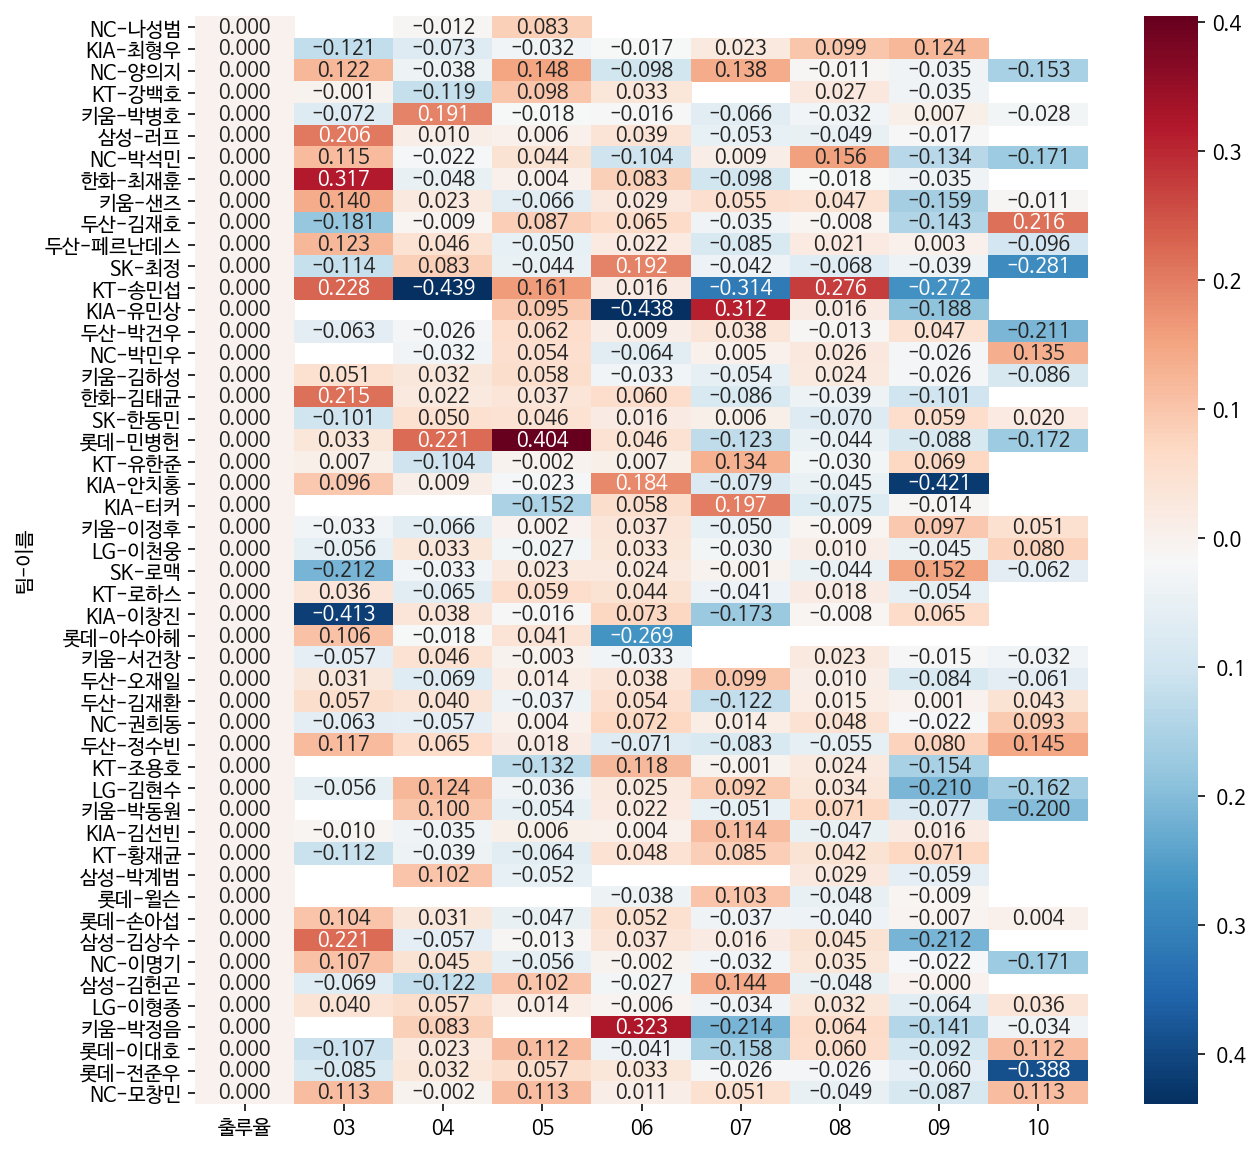

In [22]:
#  시즌 전체 대비 월별 출루율 증감 실적을 히트맵으로 표현해보겠습니다.
# 이번에는 컬러맵을 Blue ~ Red 로 나타내기 위해 RdBu_r 로 지정하였습니다. 

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

sns.heatmap(data = df_selected.head(50), 
            annot = True, fmt = '.3f', 
            cmap = 'RdBu_r'
           )